In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, roc_auc_score, average_precision_score
from statsmodels.tsa.arima.model import ARIMA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

In [2]:
import warnings
# Suppress specific warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# Load dataset
file_path = "/kaggle/input/predict-survival-of-patients-with-heart-failure/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(file_path)

In [4]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Step 2: Exploratory Data Analysis (EDA)

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [8]:
# Drop the 'time' column from the feature set
X = df.drop(['DEATH_EVENT', 'time'], axis=1)  # Features (excluding target and time variable)
y = df['DEATH_EVENT']  # Target variable

In [9]:
# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [10]:
X_resampled

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.000000,0,582,0,20,1,265000.000000,1.900000,130,1,0
1,55.000000,0,7861,0,38,0,263358.030000,1.100000,136,1,0
2,65.000000,0,146,0,20,0,162000.000000,1.300000,129,1,1
3,50.000000,1,111,0,20,0,210000.000000,1.900000,137,1,0
4,65.000000,1,160,1,20,0,327000.000000,2.700000,116,0,0
...,...,...,...,...,...,...,...,...,...,...,...
401,57.872410,0,413,0,35,0,386103.349398,4.089378,140,1,0
402,71.103083,0,582,0,20,0,263358.030000,1.830000,134,1,0
403,53.664703,0,1539,0,33,0,70235.886240,1.193176,136,0,0
404,77.321127,1,388,0,17,0,133034.929107,2.685521,135,1,0


In [11]:
y_resampled

0      1
1      1
2      1
3      1
4      1
      ..
401    1
402    1
403    1
404    1
405    1
Name: DEATH_EVENT, Length: 406, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Display the shapes of the split datasets
print("\nShapes of the split datasets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of the split datasets:
X_train: (239, 11)
X_test: (60, 11)
y_train: (239,)
y_test: (60,)


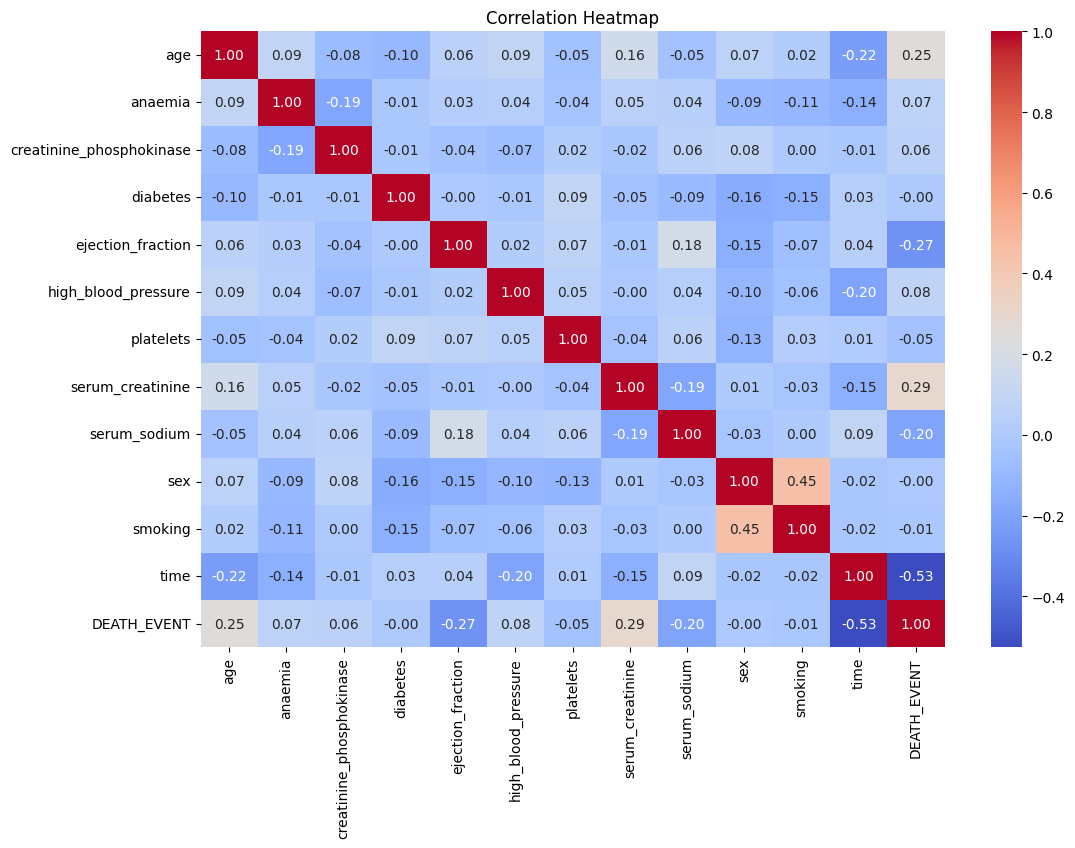

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Step 3: Feature Engineering

#### Our code provided for Step 3 scales the features using StandardScaler and displays the scaled features.

In [15]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [16]:
# Fit the scaler on the training features and transform them
X_train_scaled = scaler.fit_transform(X_train)

In [17]:
# Transform the testing features using the same scaler
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled

array([[ 1.16420244,  1.13933179, -0.35037003, ...,  0.13125912,
         0.74293206, -0.67625223],
       [ 1.16420244, -0.87770745, -0.50593309, ..., -0.54581131,
         0.74293206, -0.67625223],
       [-0.03281933,  1.13933179, -0.50064183, ..., -0.09443102,
         0.74293206, -0.67625223],
       ...,
       [-0.50609935, -0.87770745,  0.18087256, ...,  0.13125912,
         0.74293206, -0.67625223],
       [-1.42476533, -0.87770745,  0.0052027 , ..., -1.44857188,
         0.74293206,  1.4787382 ],
       [ 1.58177789, -0.87770745,  0.33961039, ...,  1.71109012,
         0.74293206,  1.4787382 ]])

In [19]:
X_test_scaled

array([[ 7.46626996e-01, -8.77707451e-01,  5.20270419e-03,
        -8.26497787e-01,  1.49345268e-01, -7.36162675e-01,
        -2.24743345e+00,  1.32203359e+00, -9.44310219e-02,
         7.42932064e-01,  1.47873820e+00],
       [-9.23674793e-01,  1.13933179e+00, -2.95340912e-01,
        -8.26497787e-01, -2.80697130e-01, -7.36162675e-01,
         1.05843720e+00, -4.90853221e-01,  8.08329548e-01,
         7.42932064e-01,  1.47873820e+00],
       [-1.34125024e+00, -8.77707451e-01,  1.97355174e+00,
         1.20992460e+00, -7.10739527e-01, -7.36162675e-01,
         7.60802546e-01, -2.89421353e-01,  5.82639405e-01,
         7.42932064e-01, -6.76252226e-01],
       [ 1.58177789e+00,  1.13933179e+00, -4.80535042e-01,
        -8.26497787e-01, -2.80697130e-01,  1.35839541e+00,
         1.33481224e+00,  8.07000115e+00, -7.71501449e-01,
         7.42932064e-01,  1.47873820e+00],
       [-1.59179551e+00, -8.77707451e-01, -5.02758338e-01,
         1.20992460e+00,  1.49345268e-01, -7.36162675e-01,
  

In [20]:
# Feature selection using RFE
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=8)
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=8)

In [21]:
# Transforming the data with selected features
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

In [22]:
X_train_rfe

array([[ 1.16420244,  1.13933179, -0.35037003, ..., -0.18870542,
         0.13125912,  0.74293206],
       [ 1.16420244, -0.87770745, -0.50593309, ...,  1.12060172,
        -0.54581131,  0.74293206],
       [-0.03281933,  1.13933179, -0.50064183, ...,  0.11344238,
        -0.09443102,  0.74293206],
       ...,
       [-0.50609935, -0.87770745,  0.18087256, ..., -0.08798949,
         0.13125912,  0.74293206],
       [-1.42476533, -0.87770745,  0.0052027 , ...,  0.21415832,
        -1.44857188,  0.74293206],
       [ 1.58177789, -0.87770745,  0.33961039, ..., -0.28942135,
         1.71109012,  0.74293206]])

In [23]:
X_test_rfe

array([[ 7.46626996e-01, -8.77707451e-01,  5.20270419e-03,
         1.49345268e-01, -7.36162675e-01,  1.32203359e+00,
        -9.44310219e-02,  7.42932064e-01],
       [-9.23674793e-01,  1.13933179e+00, -2.95340912e-01,
        -2.80697130e-01, -7.36162675e-01, -4.90853221e-01,
         8.08329548e-01,  7.42932064e-01],
       [-1.34125024e+00, -8.77707451e-01,  1.97355174e+00,
        -7.10739527e-01, -7.36162675e-01, -2.89421353e-01,
         5.82639405e-01,  7.42932064e-01],
       [ 1.58177789e+00,  1.13933179e+00, -4.80535042e-01,
        -2.80697130e-01,  1.35839541e+00,  8.07000115e+00,
        -7.71501449e-01,  7.42932064e-01],
       [-1.59179551e+00, -8.77707451e-01, -5.02758338e-01,
         1.49345268e-01, -7.36162675e-01, -1.88705419e-01,
         8.08329548e-01,  7.42932064e-01],
       [-9.23674793e-01,  1.13933179e+00,  5.01522972e-01,
        -7.10739527e-01, -7.36162675e-01, -6.92285088e-01,
        -9.44310219e-02, -1.34601809e+00],
       [-8.85238982e-02,  1.139331

# Step 4: Model Selection

#### In Step 4, our code performs model selection by iterating over different classifiers, setting up a pipeline for each classifier, defining hyperparameters grids, performing grid search, evaluating the best model, and updating the best model and its metrics. The evaluation metrics for each classifier are printed

In [24]:
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Multi-layer Perceptron": MLPClassifier(),
}

In [25]:
# Define evaluation metrics
metrics = {'accuracy': accuracy_score, 'precision': precision_score, 'recall': recall_score, 'f1': f1_score}

In [26]:
# Initialize variables to store best model and its evaluation metrics
best_model = None
best_metrics = {metric: 0 for metric in metrics}

In [27]:
# Ignore specific warnings using the filterwarnings function
warnings.filterwarnings("ignore", category=FutureWarning)
# Iterate over each classifier
for name, classifier in classifiers.items():
    if name != 'LightGBM':  # Skip LightGBM classifier
        # Filter specific warnings for each classifier
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=Warning)
            
            # Define preprocessing and classifier pipeline
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('classifier', classifier)
            ])

            # Define hyperparameters grid for GridSearchCV
            if name in ['Random Forest']:
                param_grid = {
                    'classifier__n_estimators': [50, 100, 200],
                    'classifier__max_depth': [None, 10, 20, 30],
                    'classifier__min_samples_split': [2, 5, 10],
                    'classifier__min_samples_leaf': [1, 2, 4],
                    'classifier__max_features': ['sqrt']  # Set max_features explicitly to 'sqrt'
                }
            elif name in ['Gradient Boosting', 'XGBoost']:
                param_grid = {
                    'classifier__n_estimators': [50, 100, 200],
                    'classifier__learning_rate': [0.01, 0.1, 0.5],
                    'classifier__max_depth': [3, 5, 7]
                }
            elif name == 'Logistic Regression':
                param_grid = {
                    'classifier__C': [0.1, 1, 10],
                    'classifier__penalty': ['l1', 'l2']
                }
            elif name == 'Decision Tree':
                param_grid = {
                    'classifier__max_depth': [None, 10, 20, 30],
                    'classifier__min_samples_split': [2, 5, 10],
                    'classifier__min_samples_leaf': [1, 2, 4]
                }
            else:
                param_grid = {}

            # Perform grid search with cross-validation
            grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=0)  # Set verbose to 0
            grid_search.fit(X_train, y_train)

            # Evaluate the best model
            best_estimator = grid_search.best_estimator_
            y_pred = best_estimator.predict(X_test)

            # Calculate evaluation metrics
            metrics_values = {}
            for metric, func in metrics.items():
                metrics_values[metric] = func(y_test, y_pred)

            # Print evaluation metrics
            print(f"\nClassifier: {name}")
            for metric, value in metrics_values.items():
                print(f"{metric.capitalize()}: {value:.4f}")

            # Update best model if current model has higher accuracy
            if metrics_values['accuracy'] > best_metrics['accuracy']:
                best_model = best_estimator
                best_metrics = metrics_values
# Reset the warnings filter to its default state
warnings.filterwarnings("default")


Classifier: Logistic Regression
Accuracy: 0.6667
Precision: 0.8571
Recall: 0.2400
F1: 0.3750

Classifier: Decision Tree
Accuracy: 0.7167
Precision: 0.7500
Recall: 0.4800
F1: 0.5854

Classifier: Random Forest
Accuracy: 0.6667
Precision: 0.6667
Recall: 0.4000
F1: 0.5000

Classifier: Gradient Boosting
Accuracy: 0.7167
Precision: 0.8333
Recall: 0.4000
F1: 0.5405

Classifier: Support Vector Machine
Accuracy: 0.7000
Precision: 0.7692
Recall: 0.4000
F1: 0.5263

Classifier: K-Nearest Neighbors
Accuracy: 0.6667
Precision: 0.8571
Recall: 0.2400
F1: 0.3750

Classifier: Naive Bayes
Accuracy: 0.6333
Precision: 0.7143
Recall: 0.2000
F1: 0.3125


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro


Classifier: Multi-layer Perceptron
Accuracy: 0.7167
Precision: 0.7857
Recall: 0.4400
F1: 0.5641


# Step 5: Visualisation

In [28]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

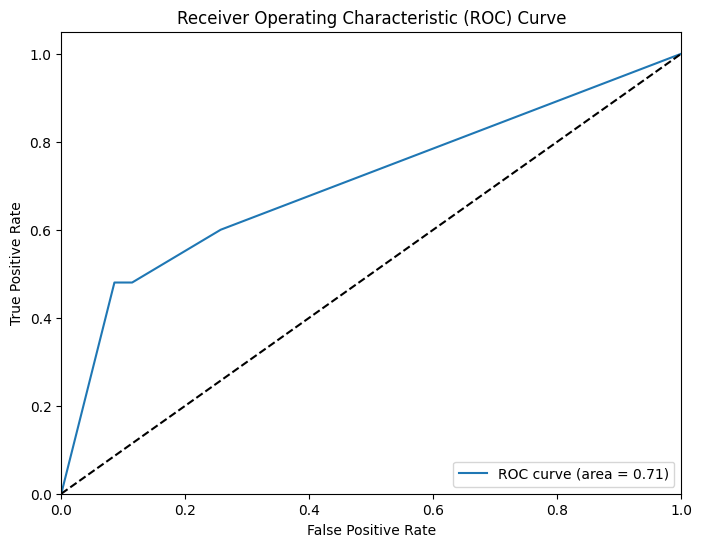

In [29]:
# ROC Curve
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

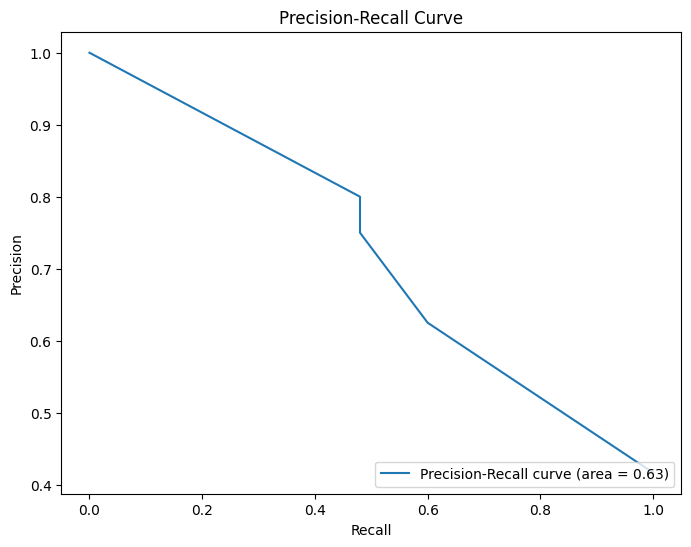

In [30]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % average_precision_score(y_test, y_prob))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Step 6: Optimize Grid Search Parameters

In [31]:
# Define hyperparameters grid for GridSearchCV with more parameters
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.1, 0.5, 1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10]
}

In [32]:
# Define hyperparameters grid for GridSearchCV
if name == 'Logistic Regression':
    param_grid = {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2']
    }
else:
    param_grid = {}

In [33]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [34]:
# Print the best parameters and its accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {}
Best Accuracy: 0.7278368794326242


In [35]:
# Define separate parameter grids for different solvers
param_grid = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300]},
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300]}
]

In [36]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_rfe, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300],
                          'penalty': ['l2'], 'solver': ['lbfgs']}],
             scoring='accuracy')

In [37]:
# Output the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

Best parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.7696808510638298


In [38]:
# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [39]:
# Train the Logistic Regression model with the best parameters
best_log_reg = grid_search.best_estimator_
best_log_reg.fit(X_train_rfe, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [40]:
# Predict on the test data
y_pred = best_log_reg.predict(X_test_rfe)

In [41]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [42]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.65
Precision: 0.75
Recall: 0.24
F1 Score: 0.36
ROC AUC Score: 0.59


In [43]:
# Cross-validation score
cv_scores = cross_val_score(best_log_reg, X_train_rfe, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-validation accuracy: 0.77 ± 0.04
